# Titanic - Machine Learning from Disaster

I will be using the Titanic dataset from Kaggle to predict the survival of passengers on the Titanic. I will start by exploring the data, then preprocessing the data, made first ML model, improve the model, and finally make the final model.

In [8]:
!pip install -U transformers datasets evaluate accelerate

In [11]:
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"

^C


In [4]:
!pip install -U transformers

                                              0.0/10.0 MB ? eta -:--:--
                                              0.0/10.0 MB ? eta -:--:--
                                              0.0/10.0 MB ? eta -:--:--
                                              0.1/10.0 MB 1.1 MB/s eta 0:00:10
     -                                        0.3/10.0 MB 1.5 MB/s eta 0:00:07
     --                                       0.5/10.0 MB 2.1 MB/s eta 0:00:05
     --                                       0.6/10.0 MB 2.2 MB/s eta 0:00:05
     --                                       0.6/10.0 MB 2.2 MB/s eta 0:00:05
     ---                                      0.8/10.0 MB 2.2 MB/s eta 0:00:05
     ---                                      0.9/10.0 MB 2.2 MB/s eta 0:00:05
     ----                                     1.2/10.0 MB 2.6 MB/s eta 0:00:04
     ----                                     1.2/10.0 MB 2.6 MB/s eta 0:00:04
     ----                                     1.2/10.0 MB 2.6 MB/s eta 0:

In [9]:
!pip install 'transformers[torch]'

ERROR: Invalid requirement: "'transformers[torch]'"


In [7]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', framework="pt", device="cuda") 
classifier('we love you')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\USER\anaconda3\Lib\site-packages\transformers\models\distilbert\modeling_distilbert.py:403: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


[{'label': 'POSITIVE', 'score': 0.9998704195022583}]

In [6]:
!export CUDA_VISIBLE_DEVICES="0"

'export' is not recognized as an internal or external command,
operable program or batch file.


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Data

In [3]:
dataset = pd.read_csv('train.csv')
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Based on the data description, the columns in the dataset are:
- PassengerId: A unique ID for each passenger
- Survived: Whether the passenger survived (0 = No, 1 = Yes)
- Pclass: The class of the ticket the passenger purchased (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: The name of the passenger
- Sex: The Sex of Passenger
- Age: The age of the passenger
- SibSp: The number of siblings/spouses the passenger has aboard the Titanic
- Parch: The number of parents/children the passenger has aboard the Titanic
- Ticket: The ticket number of the passenger
- Fare: The fare paid by the passenger
- Cabin: The cabin number
- Embarked: The port the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
# Searching for missing values
print(dataset.isnull().sum())
# percentage of missing values
print(dataset.isnull().sum()/len(dataset)*100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


It looks like cabin has a lot of missing values, 77% of it is a missing values and ages have 20% missing values. I will drop the cabin column and fill the missing values in the age column but with searching the skewness of the age column and drop the missing values in embarked since it so low. If the age column is skewed, I will fill the missing values with the median, otherwise, I will fill it with the mean.

In [5]:
# Droping the columns with more than 50% missing values
dataset = dataset.drop(columns=['Cabin'])


C:\Users\USER\AppData\Local\Temp\ipykernel_5696\4107323008.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['Age'], color='red', shade=True)


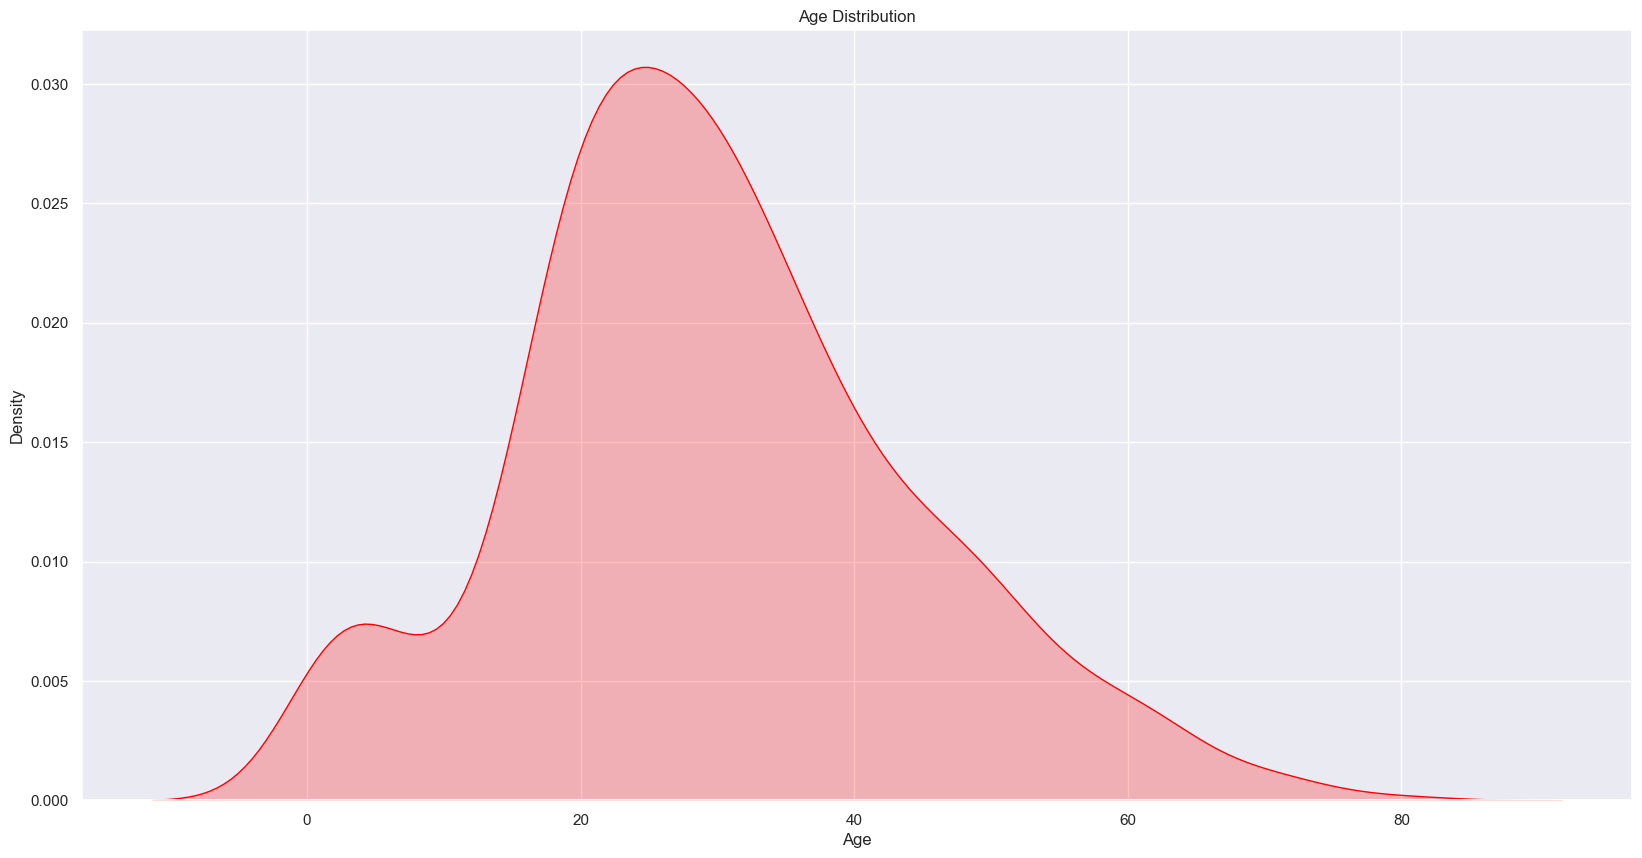

0.38910778230082704


In [6]:
# Searching and visualizing the age distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(20,10))
sns.kdeplot(dataset['Age'], color='red', shade=True)
plt.title('Age Distribution')
plt.show()

# Searching the skewness of the age distribution
print(dataset['Age'].skew())


In [7]:
# Since the age distribution is skewed, we will replace the missing values with the median
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [8]:
# Searching for missing values
print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [9]:
# Drop missing values in the Embarked column
dataset = dataset.dropna()

The Training data have been preprocessed and now I will preprocess the test data.

In [10]:
test_dataset = pd.read_csv('test.csv')
test_dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [11]:
print(test_dataset.isnull().sum())
print(test_dataset.isnull().sum()/len(test_dataset)*100)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


It's looks like the test data have the same missing values as the training data. I will drop the cabin column and fill the missing values in the age column but with searching the skewness of the age column and drop the missing values in embarked since it so low. If the age column is skewed, I will fill the missing values with the median, otherwise, I will fill it with the mean.

In [12]:
# Droping the columns with more than 50% missing values
test_dataset = test_dataset.drop(columns=['Cabin'])

0.4573612871503845


C:\Users\USER\AppData\Local\Temp\ipykernel_5696\3639917173.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_dataset['Age'], color='red', shade=True)


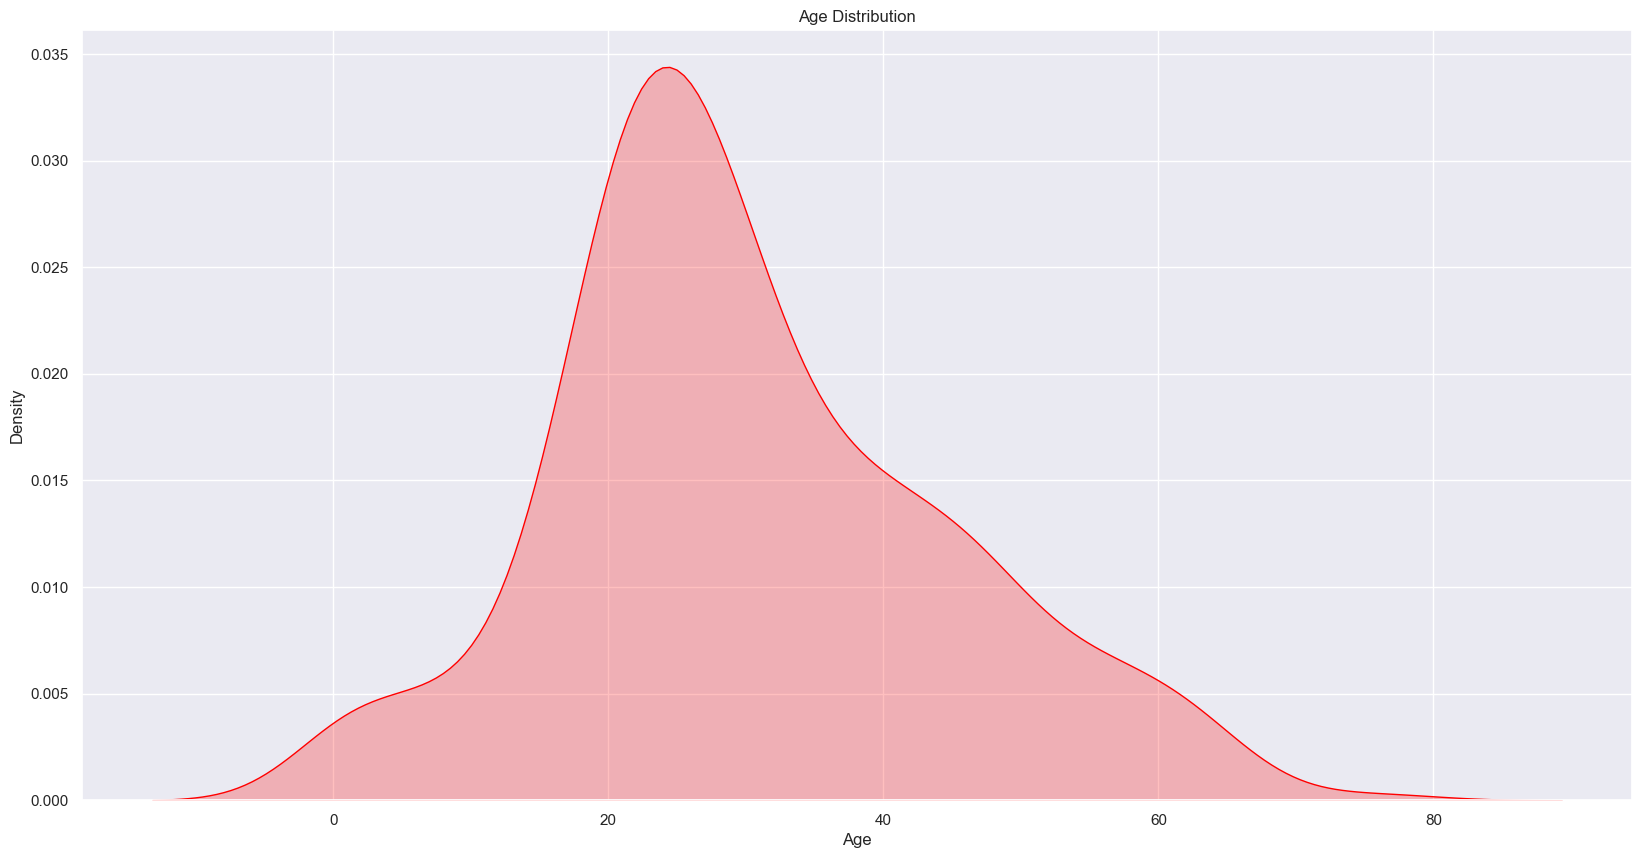

In [13]:
# Searching the skewness of the age distribution
print(test_dataset['Age'].skew())

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(20,10))
sns.kdeplot(test_dataset['Age'], color='red', shade=True)
plt.title('Age Distribution')
plt.show()


In [14]:
# Fill the missing values in the age column with the median
test_dataset['Age'] = test_dataset['Age'].fillna(test_dataset['Age'].median())

After the data has been cleaned, now I will visualize the data to see the correlation between the features and the target.

C:\Users\USER\AppData\Local\Temp\ipykernel_5696\1187359927.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


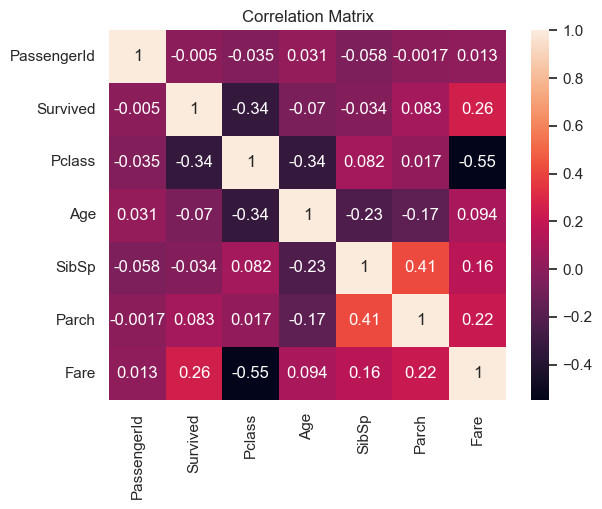

In [15]:
# Making the visualization of all data with heatmap
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()